Задача 2: аппроксимация функции
Рассмотрим сложную математическую функцию на отрезке [1, 15]:

f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)

https://www.coursera.org/learn/mathematics-and-python/programming/QySgp/linieinaia-alghiebra-skhodstvo-tiekstov-i-approksimatsiia-funktsii

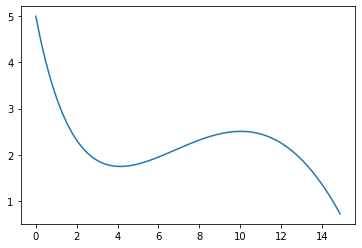

In [154]:
from matplotlib import pylab as plt
import numpy as np

def f(x):
    return np.sin(x / 5) * np.exp (x / 10) + 5 * np.exp(-x / 2)

x = np.arange(0, 15, 0.1)
y = f(x)

plt.plot(x, y)
plt.show()

Она может описывать, например, зависимость оценок, которые выставляют определенному сорту вина эксперты, в зависимости от возраста этого вина. По сути, задача машинного обучения состоит в том, чтобы приблизить сложную зависимость с помощью функции из определенного семейства. В этом задании мы будем приближать указанную функцию с помощью многочленов.

Как известно, многочлен степени n (то есть w_0 + w_1 x + w_2 x^2 + ... + w_n x^n) однозначно определяется любыми n + 1 различными точками, через которые он проходит. Это значит, что его коэффициенты w_0, ... w_n можно определить из следующей системы линейных уравнений:


где через x_1, ..., x_n, x_{n+1} обозначены точки, через которые проходит многочлен, а через f(x_1), ..., f(x_n), f(x_{n+1}) — значения, которые он должен принимать в этих точках.

Воспользуемся описанным свойством, и будем находить приближение функции многочленом, решая систему линейных уравнений.

1. Сформируйте систему линейных уравнений (то есть задайте матрицу коэффициентов A и свободный вектор b) для многочлена первой степени, который должен совпадать с функцией f в точках 1 и 15. Решите данную систему с помощью функции scipy.linalg.solve. Нарисуйте функцию f и полученный многочлен. Хорошо ли он приближает исходную функцию?

A*X = B

In [164]:
from scipy.linalg import solve


def plot_app_solution(xl, func):
    A_m = [[pow(xi, i) for i in range(0, len(xl))] for xi in xl]
    B_v = [func(xi) for xi in xl]
    X_v = solve(A_m, B_v)
    print("Решение. Вектор неизвестных коэффициентов для аппроксимации функции:\n {}".format(X_v) )
    x_plot = np.arange(min(xl), max(xl), 0.1)
    y_plot = func(x_plot)

    def fucn_app(x):
        xv = [pow(x, i) for i in range(0, len(X_v))]
        return np.dot(xv, X_v)

    y_plot_app = [fucn_app(x) for x in x_plot]
    plt.plot(x_plot, y_plot)
    plt.plot(x_plot, y_plot_app)
    plt.show()

    return X_v

Решение. Вектор неизвестных коэффициентов для аппроксимации функции:
 [ 3.43914511 -0.18692825]


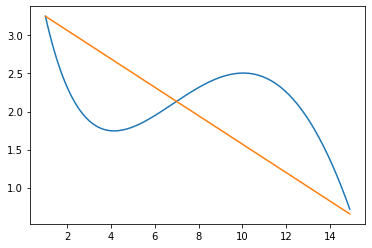

array([ 3.43914511, -0.18692825])

In [165]:
x_list = [1, 15]
plot_app_solution(x_list, f)

Повторите те же шаги для многочлена второй степени, который совпадает с функцией f в точках 1, 8 и 15. Улучшилось ли качество аппроксимации?

Решение. Вектор неизвестных коэффициентов для аппроксимации функции:
 [ 3.32512949 -0.06531159 -0.00760104]


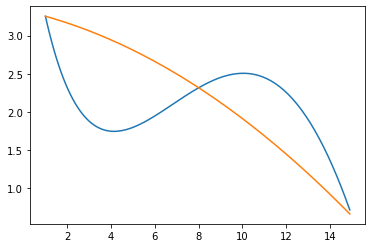

array([ 3.32512949, -0.06531159, -0.00760104])

In [166]:
x_list = [1, 8, 15]
plot_app_solution(x_list, f)

Повторите те же шаги для многочлена третьей степени, который совпадает с функцией f в точках 1, 4, 10 и 15. Хорошо ли он аппроксимирует функцию? Коэффициенты данного многочлена (четыре числа в следующем порядке: w_0, w_1, w_2, w_3) являются ответом на задачу. Округлять коэффициенты не обязательно, но при желании можете произвести округление до второго знака (т.е. до числа вида 0.42)

Решение. Вектор неизвестных коэффициентов для аппроксимации функции:
 [ 4.36264154 -1.29552587  0.19333685 -0.00823565]


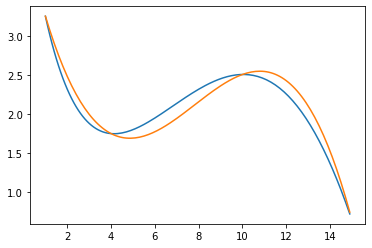

In [193]:
x_list = [1, 4, 10, 15]
solution = plot_app_solution(x_list, f)

Запишите полученные числа в файл, разделив пробелами. Обратите внимание, что файл должен состоять из одной строки, в конце которой не должно быть переноса. Пример файла с решением вы можете найти в конце задания (submission-2.txt).

In [199]:
solution_str = np.round(solution, 2).astype(str)
output_str = ' '.join(solution_str)
file_obj  = open('submission2.txt', 'w')
file_obj.write(output_str)
file_obj.close()

In [181]:
# n = 15
# x_list_list= [np.linspace(1, 100, i) for i in range (2, n)]
# for x_list in x_list_list:
#     print("n = {}. {}".format(len(x_list), x_list))
#     plot_app_solution(x_list, f)